In [ ]:
! python3 -m pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


In [ ]:
import PIL
from PIL import Image
import numpy as np
import json
import math
from numpy.linalg import inv
import cv2
import requests
from io import BytesIO


def get_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        return image

url = "https://dinopixel.com/preload/0220/blue-checkerboard.png"  # Replace with the actual URL of the image (make sure to use URL which ends with png)
image = get_url(url)


with open('./teapot3.json') as json_file:
    data = json.load(json_file)
print(data)

with open('./Scene.json') as json_file:
    Scene = json.load(json_file)

im=Image.new('RGB',[512,512],0x000000)
width,height=im.size
for y in range(height):
    for x in range(width):
        im.putpixel((x, y), (0, 0, 0, 255))

im1=Image.new('RGB',[512,512],0x000000)
width,height=im.size
for y in range(height):
    for x in range(width):
        im1.putpixel((x, y), (0, 0, 0, 255))

im2=Image.new('RGB',[512,512],0x000000)
width,height=im.size
for y in range(height):
    for x in range(width):
        im2.putpixel((x, y), (0, 0, 0, 255))

im3=Image.new('RGB',[512,512],0x000000)
width,height=im.size
for y in range(height):
    for x in range(width):
        im3.putpixel((x, y), (0, 0, 0, 255))

im4=Image.new('RGB',[512,512],0x000000)
width,height=im.size
for y in range(height):
    for x in range(width):
        im4.putpixel((x, y), (0, 0, 0, 255))

im5=Image.new('RGB',[512,512],0x000000)
width,height=im.size
for y in range(height):
    for x in range(width):
        im5.putpixel((x, y), (0, 0, 0, 255))

im6=Image.new('RGB',[512,512],0x000000)
width,height=im.size
for y in range(height):
    for x in range(width):
        im6.putpixel((x, y), (0, 0, 0, 255))

class Color:
    def __init__(self, red=0, green=0, blue=0):
        self.red = red
        self.green = green
        self.blue = blue

def computeVertexColor(normal, lights ,material,vertices,color):
    ka=0.5
    kd=0.5
    ks=0.5
    n=2
    N=normal

    d=np.array([0.0,0.0,0.0])
    s=np.array([0.0,0.0,0.0])
    for light in lights:
        if light['type'] == 'ambient':
          la = np.dot(light['intensity'],light['color'])
        elif light['type'] == 'directional':
          L = np.subtract(light['from'], light['to'])
          L = L.astype(float)
          L /= np.linalg.norm(L)
          E=np.subtract([0,0,0],vertices)
          E/=np.linalg.norm(E)

          if np.dot(N,L)<0 and np.dot(N,E)<0:
            N = [-x for x in N]
          N/=np.linalg.norm(N)
          le=np.dot(light['intensity'],[1,1,1])
          d = max(np.dot(N, L),0.0)
          d = d*le

            #R = 2 * np.dot(N, L) * N - L
            #R/=np.linalg.norm(R)
          H=L+E
          H/=np.linalg.norm(H)

          s = max(np.dot(N, H),0)
          s=min(1,s)

          s =(s ** n) * le

    Cs=color
    C=la*ka+d*kd+s*ks+Cs*0.7
    C = np.clip(C, 0, 1)
    triColor = Color()
    triColor.red = C[0]
    triColor.green = C[1]
    triColor.blue = C[2]

    return triColor


def interpolateColors(alpha, beta, gamma, color1, color2, color3):
    triColor = Color()
    triColor.red = alpha * color1.red + beta * color2.red + gamma * color3.red
    triColor.green = alpha * color1.green + beta * color2.green + gamma * color3.green
    triColor.blue = alpha * color1.blue + beta * color2.blue + gamma * color3.blue

    return triColor

def f(x, y,xa,ya,xb,yb):
    return (ya - yb) * x + (xb - xa) * y + xa * yb - xb * ya

def transfroamtion(T,S,R,vertices,norm):


  Trans=np.array([
    [1, 0,0, 0],
    [0, 1,0, 0],
    [0,0,1, 0],
    [0, 0, 0, 1]
  ])
  Scale=np.array([
    [1, 0,0, 0],
    [0, 1,0, 0],
    [0,0,1, 0],
    [0, 0, 0, 1]
  ])
  if 'Rx' in R:
    Rotate=np.array([
        [1, 0, 0, 0],
        [0, np.cos(R['Rx']), -np.sin(R['Rx']), 0],
        [0, np.sin(R['Rx']), np.cos(R['Rx']), 0],
        [0, 0, 0, 1]
    ])
  if 'Ry' in R:
    Rotate=np.array([
        [np.cos(np.radians(0)), 0, np.sin(np.radians(0)), 0],
        [0, 1, 0, 0],
        [-np.sin(np.radians(0)), 0, np.cos(np.radians(0)), 0],
        [0, 0, 0, 1]
    ])
  if 'Rz' in R:
     Rotate=np.array([
        [np.cos(R['Rz']), -np.sin(R['Rz']), 0, 0],
        [np.sin(R['Rz']), np.cos(R['Rz']), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

  if(norm==1):
    I=np.dot(Scale,Rotate)
    I=inv(I)
    I=I.T
    I=np.dot(I,vertices)
    return I
  else:
    I=np.dot(Scale,vertices)
    I=np.dot(Rotate,I)
    I=np.dot(Trans,I)
    return I


def raster(vert,dx,dy):
  x_w = (vert[0]+1) * (511) / 2 - (dx)
  y_w = (1-vert[1]) * (511) / 2 - (dy)
  z_w= vert[2]
  return x_w,y_w,z_w

def interpolateNormals(alpha, beta, gamma, n1, n2, n3):
    normal=[0,0,0]
    normal[0]= alpha * n1[0] + beta *n2[0] + gamma * n3[0]
    normal[1]= alpha * n1[1] + beta *n2[1] + gamma * n3[1]
    normal[2]= alpha * n1[2] + beta *n2[2] + gamma * n3[2]
    return normal

def interpolateTex(alpha,beta,gamma,texCoord1,texCoord2,texCoord3,z):
  texCoord=[0,0]

  texCoord[0]= alpha * texCoord1[0] + beta *texCoord2[0] + gamma * texCoord3[0]
  texCoord[1]= alpha * texCoord1[1] + beta *texCoord2[1] + gamma * texCoord3[1]

  z1=1/(alpha * z[0] + beta *z[1] + gamma * z[2])
  texCoord[0]*=z1
  texCoord[1]*=z1
  return texCoord

def texturelookup(u,v,image):
  w,h=image.size
  x=u*w-1
  y=v*h-1
  p0=np.array(image.getpixel((int(x),int(y))))
  p1=np.array(image.getpixel((1+int(x),1+int(y))))
  p2=np.array(image.getpixel((1+int(x),int(y))))
  p3=np.array(image.getpixel((int(x),1+int(y))))

  f=x-int(x)
  g=y-int(y)
  i=f*p2+(1-f)*p0
  j=f*p1+(1-f)*p3
  if f==0 and g==0:
    C=p0/255
    C = np.clip(C, 0, 1)
    return C
  else:
    C=(g*j+(1-g)*i)/255
    C = np.clip(C, 0, 1)
    return C


{'data': [{'v0': {'v': [1.4, 2.25, 0.0], 'n': [-0.902861, -0.429934, 0.0], 't': [0.0, 0.0]}, 'v1': {'v': [1.2915, 2.25, 0.5495], 'n': [-0.833024, -0.43081, -0.347093], 't': [0.25, 0.0]}, 'v2': {'v': [1.273482, 2.323828, 0.541834], 'n': [-0.918898, 0.095044, -0.382874], 't': [0.25, 0.25]}}, {'v0': {'v': [1.4, 2.25, 0.0], 'n': [-0.902861, -0.429934, 0.0], 't': [0.0, 0.0]}, 'v1': {'v': [1.273482, 2.323828, 0.541834], 'n': [-0.918898, 0.095044, -0.382874], 't': [0.25, 0.25]}, 'v2': {'v': [1.380469, 2.323828, 0.0], 'n': [-0.995495, 0.09481, -0.0], 't': [0.0, 0.25]}}, {'v0': {'v': [1.380469, 2.323828, 0.0], 'n': [-0.995495, 0.09481, -0.0], 't': [0.0, 0.25]}, 'v1': {'v': [1.273482, 2.323828, 0.541834], 'n': [-0.918898, 0.095044, -0.382874], 't': [0.25, 0.25]}, 'v2': {'v': [1.294383, 2.348438, 0.550727], 'n': [-1e-06, 1.0, -0.0], 't': [0.25, 0.5]}}, {'v0': {'v': [1.380469, 2.323828, 0.0], 'n': [-0.995495, 0.09481, -0.0], 't': [0.0, 0.25]}, 'v1': {'v': [1.294383, 2.348438, 0.550727], 'n': [-1e-

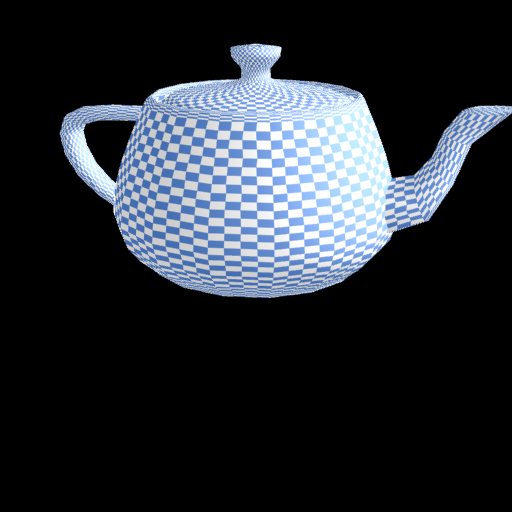

In [ ]:
number_of_teapots = Scene['scene']['shapes']
From=(Scene['scene']['camera']['from'])
To=(Scene['scene']['camera']['to'])

n=np.subtract(To,From)
n =n/np.linalg.norm(n)

u=np.cross(n,[0,1,0])
u =u/np.linalg.norm(u)

v=np.cross(u, n)
r=From

camera_matrix = ([
    [u[0], u[1], u[2], -np.dot(u,r)],
    [v[0], v[1], v[2], -np.dot(v,r)],
    [-n[0], -n[1], -n[2], np.dot(n,r)],
    [0, 0, 0, 1]
  ])


left=-1
right=1
top=1
bottom=-1
near = 3
far = 10
projection_matrix = ([
      [(2*near)/(right-left), 0, (right+left)/(right-left), 0],
      [0, (2*near)/(top-bottom), (top+bottom)/(top-bottom), 0],
      [0, 0, -(far + near) / (far - near), -2 * far * near / (far - near)],
      [0, 0, -1, 0]
  ])


aa =[im1,im2,im3,im4,im5,im6]
AA =[-0.52,  0.38, 0.128,
 0.41,  0.56, 0.119,
 0.27,  0.08, 0.294,
-0.17, -0.29, 0.249,
 0.58, -0.55, 0.104,
-0.31, -0.71, 0.106]
for a in range(6):
  for i in range(1,2):
    with open('./teapot3.json') as json_file:
      data = json.load(json_file)
    R = Scene['scene']['shapes'][i]['transforms'][0]
    S = Scene['scene']['shapes'][i]['transforms'][1]['S']
    T = Scene['scene']['shapes'][i]['transforms'][2]['T']

    for item in data['data']:
      for vertexNum in ['v0', 'v1', 'v2']:
          x,y,z = item[vertexNum]['v'][:3]
          n1,n2,n3 = item[vertexNum]['n'][:3]
          vertices=[x,y,z,1]
          norm=[n1,n2,n3,0]

          vertices = transfroamtion(T,S,R,vertices,0)
          norm = transfroamtion(T,S,R,norm,1)

          vertices = np.dot(camera_matrix,vertices)
          norm = np.dot(camera_matrix,norm)
          u,v=item[vertexNum]['t'][:2]
          texCoord=[u,v]
          texCoord/=vertices[2]
          item[vertexNum]['t'][:2]=texCoord
          item[vertexNum]['x']=vertices

          ndc_vertices = np.dot(projection_matrix, vertices)
          ndc_vertices /= ndc_vertices[3]

          x_rt, y_rt,z_rt=raster(ndc_vertices,AA[a*3],AA[a*3+1])

          item[vertexNum]['v'][0] = x_rt
          item[vertexNum]['v'][1] = y_rt
          item[vertexNum]['v'][2] = z_rt
          item[vertexNum]['n'][:3] = norm[:3]



    z_buffer = [[float('inf') for _ in range(width)] for _ in range(height)]
    lights = Scene['scene']['lights']
    material = Scene['scene']['shapes'][i]['material']

    for item in data['data']:
      x0, y0,z0 = item['v0']['v'][:3]
      x1, y1,z1 = item['v1']['v'][:3]
      x2, y2,z2= item['v2']['v'][:3]
      normal1 = item['v0']['n'][:3]
      normal2 = item['v1']['n'][:3]
      normal3 = item['v2']['n'][:3]
      vert1= item['v0']['x'][:3]
      vert2=item['v1']['x'][:3]
      vert3=item['v2']['x'][:3]
      texCoord1 =item['v0']['t'][:2]
      texCoord2 =item['v1']['t'][:2]
      texCoord3 =item['v2']['t'][:2]

      xmin = math.floor(min(x0, x1, x2))
      xmax = math.ceil(max(x0, x1, x2))
      ymin = math.floor(min(y0, y1, y2))
      ymax = math.ceil(max(y0, y1, y2))
      m=0

      for y in range(ymin,ymax):
        for x in range(xmin, xmax):
            alpha = f(x,y,x1,y1,x2,y2) / f(x0,y0,x1,y1,x2,y2)
            beta = f(x,y,x2,y2,x0,y0) / f(x1,y1,x2,y2,x0,y0)
            gamma = f(x,y,x0,y0,x1,y1) / f(x2,y2,x0,y0,x1,y1)
            if 0 <= alpha <=1  and 0 <= beta<=1  and 0<= gamma <=1:
              if 0 <= x < width and 0 <= y < height:
                z_at_pixel = alpha * z0 + beta * z1 + gamma * z2
                if z_at_pixel < z_buffer[x][y]:
                  texCoord = interpolateTex(alpha,beta,gamma,texCoord1,texCoord2,texCoord3,[1/vert1[2],1/vert2[2],1/vert3[2]])
                  normal = interpolateNormals(alpha,beta,gamma,normal1,normal2,normal3)
                  vert = interpolateNormals(alpha,beta,gamma,vert1,vert2,vert3)

                  color = texturelookup(texCoord[0],texCoord[1],image)[:3]

                  triangle_color =computeVertexColor(normal, lights,material,vert,color)
                  aa[a].putpixel((x, y), (int(255 * triangle_color.red), int(255 * triangle_color.green), int(255 * triangle_color.blue)))
                  z_buffer[x][y] = z_at_pixel

for y in range(512):
    for x in range(512):
        color = (
            im1.getpixel((x, y))[0] * 0.128 +
            im2.getpixel((x, y))[0] * 0.119 +
            im3.getpixel((x, y))[0] * 0.294 +
            im4.getpixel((x, y))[0] * 0.249 +
            im5.getpixel((x, y))[0] * 0.104 +
            im6.getpixel((x, y))[0] * 0.106,

            im1.getpixel((x, y))[1] * 0.128 +
            im2.getpixel((x, y))[1] * 0.119 +
            im3.getpixel((x, y))[1] * 0.294 +
            im4.getpixel((x, y))[1] * 0.249 +
            im5.getpixel((x, y))[1] * 0.104 +
            im6.getpixel((x, y))[1] * 0.106,

            im1.getpixel((x, y))[2] * 0.128 +
            im2.getpixel((x, y))[2] * 0.119 +
            im3.getpixel((x, y))[2] * 0.294 +
            im4.getpixel((x, y))[2] * 0.249 +
            im5.getpixel((x, y))[2] * 0.104 +
            im6.getpixel((x, y))[2] * 0.106
        )

        color = (color[0], color[1], color[2])
        im.putpixel((x, y), (int(color[0]), int(color[1]), int(color[2])))

im
